In [1]:
import pandas as pd
import geopandas as gpd

In [15]:
fips = pd.read_csv("../raw_data/US_FIPS_Codes.csv")
nc_shape = gpd.read_file("../data/nc_county_2020_shp")
us_shape = gpd.read_file("../raw_data/tl_2020_us_state")

## Clean up NC FIPS county codes

In [3]:
fips.head()

,U.S. FIPS County Codes,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,State,County Name,FIPS State,FIPS County
1,Alabama,Autauga,01,001
2,Alabama,Baldwin,01,003
3,Alabama,Barbour,01,005
4,Alabama,Bibb,01,007


In [4]:
fips.columns = ["STATE", "NAME20", "STATEFP20", "COUNTYFP20"]

In [5]:
fips.drop(index=0, inplace=True)

In [6]:
nc_fips = fips.loc[fips["STATE"] == "North Carolina"].reset_index(drop=True)

In [7]:
nc_fips["GEOID20"] = nc_fips["STATEFP20"] + nc_fips["COUNTYFP20"]

In [8]:
nc_fips.head()

,STATE,NAME20,STATEFP20,COUNTYFP20,GEOID20
0,North Carolina,Alamance,37,001,37001
1,North Carolina,Alexander,37,003,37003
2,North Carolina,Alleghany,37,005,37005
3,North Carolina,Anson,37,007,37007
4,North Carolina,Ashe,37,009,37009


In [9]:
# nc_fips.to_csv("../data/nc_county_fips.csv")

## Check identifying data in nc_county_fips matches shapefile data

Source for NC county shapefiles and US state shapefiles: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

Documentation: https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html

In [17]:
nc_shape.head()

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,CBSAFP20,METDIVFP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,135,01008576,37135,Orange,Orange County,06,H1,G4020,450,20500,None,A,1029673918,8806896,+36.0625255,-079.1200340,"POLYGON ((-79.26198 36.03505, -79.26196 36.035..."
1,37,049,01026123,37049,Craven,Craven County,06,H1,G4020,404,35100,None,A,1830014545,172777667,+35.1168292,-077.0813197,"POLYGON ((-77.20903 35.09147, -77.20926 35.091..."
2,37,195,01008596,37195,Wilson,Wilson County,06,H1,G4020,468,48980,None,A,952013027,14332439,+35.7003569,-077.9215978,"POLYGON ((-78.03802 35.78752, -78.03697 35.787..."
3,37,061,01026132,37061,Duplin,Duplin County,06,H1,G4020,None,None,None,A,2110115795,14237879,+34.9344033,-077.9335434,"POLYGON ((-78.15706 35.04038, -78.15781 35.051..."
4,37,087,01008561,37087,Haywood,Haywood County,06,H1,G4020,120,11700,None,A,1433713844,2438478,+35.5588823,-082.9813074,"POLYGON ((-83.15657 35.55209, -83.15606 35.552..."


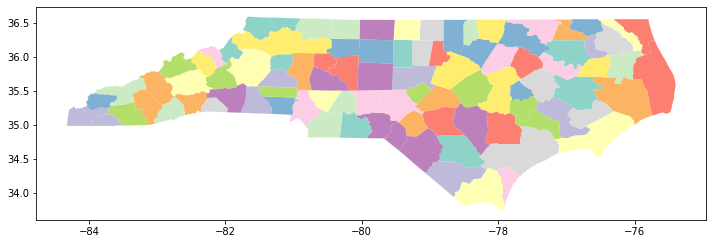

In [10]:
nc_shape.plot(figsize=(12, 10), column="COUNTYFP20", cmap="Set3")

In [11]:
nc_fips_comp = nc_fips[["COUNTYFP20", "NAME20", "GEOID20"]]

In [12]:
nc_shape_comp_sorted = nc_shape[["COUNTYFP20", "NAME20", "GEOID20"]].sort_values(
    by="COUNTYFP20").reset_index(drop=True)

In [13]:
nc_fips_comp.equals(nc_shape_comp_sorted)

True

## Clean up states shapefile

In [25]:
us_shape.rename(columns={"STATEFP":"STATEFP20"}, inplace=True)

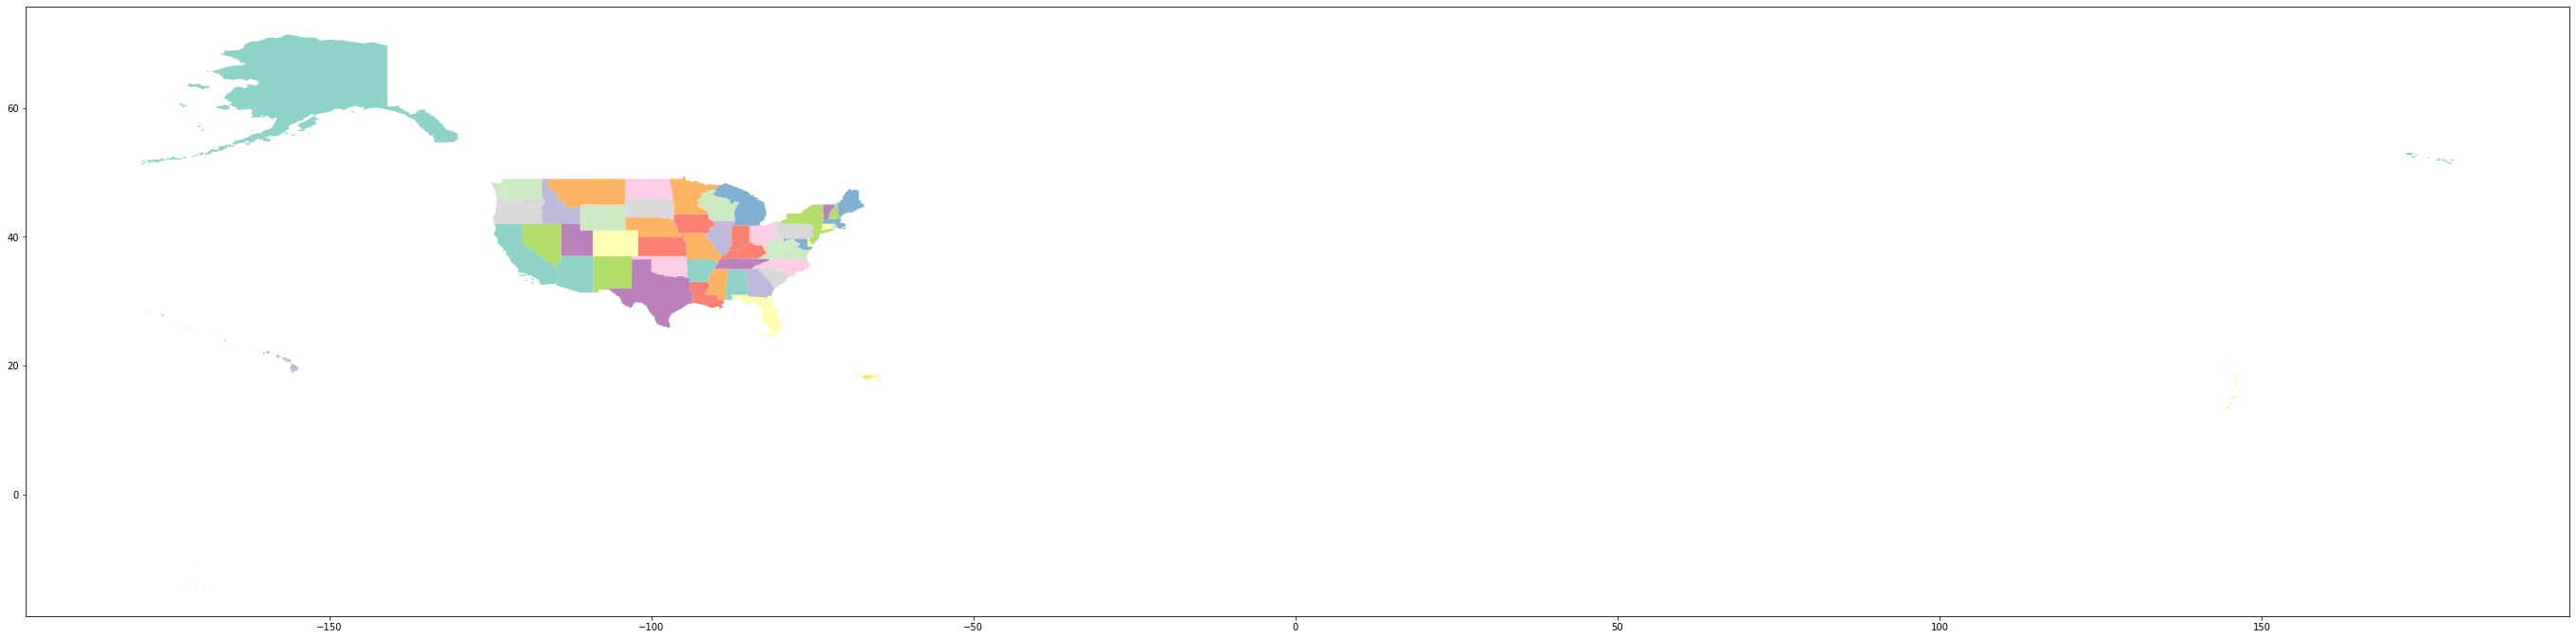

In [26]:
us_shape.plot(figsize = (48, 40), column = "STATEFP20", cmap = "Set3")

In [27]:
us_shape.head()

,REGION,DIVISION,STATEFP20,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [28]:
# us_shape.to_file("../data/state_2020_shp")